0.7656777839199066


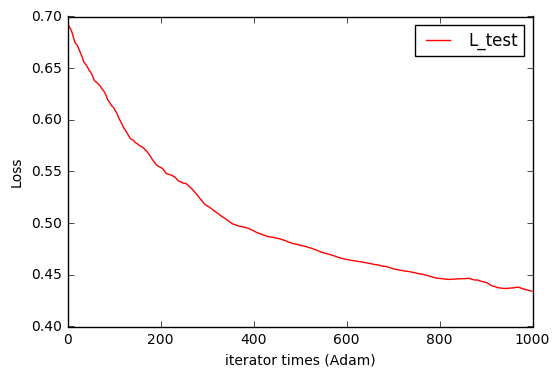

In [13]:
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_svmlight_file
from sklearn.externals.joblib import Memory
import matplotlib.pyplot as plt
import math
import random

data = load_svmlight_file("a9a.txt")
X_train, y_train = data[0], data[1]
#print(X[0,0])
X_train = X_train.dot(np.eye(123))
#print(len(X))   32561
b_tr = np.ones((32561,1))
X_train = np.column_stack((X_train, b_tr))
#print(X)
#print(X.shape[1])
y_train = (y_train+1)/2
n_train = X_train.shape[0]

test = load_svmlight_file("a9a_test.txt")
X_test, y_test = test[0], test[1]
X_test = X_test.dot(np.eye(122))
a = np.zeros((16281,1))
X_test = np.column_stack((X_test, a))
b_te = np.ones((16281, 1))
X_test = np.column_stack((X_test, b_te))
y_test = (y_test+1)/2
n_test = X_test.shape[0]

w = np.zeros((124, 1))
g = np.zeros((124, 1))
G = np.zeros((124, 1))
v = np.zeros((124, 1))
m = np.zeros((124, 1))
transin = np.zeros((124, 1))
tran = np.zeros((124, 1))
L_test = np.zeros((1000, 1))
lossHelp = np.zeros((n_test, 1))
Y_test = np.zeros(n_test)
h = np.zeros((n_test, 1))

def sigmiod(x):
    if (x>=7):
        return 1
    # e^x/(1+e^x)
    if(x<=-7):
        return 0.0000001
    return 1.0/(1.0 + math.exp(-x))

def lossFunc(h, y):
    if(h <= 0):
        return -100
    if(h >= 1):
        return -100
    tmp = y*math.log(h)+(1-y)*math.log(1-h)
    return tmp

learningRate = 0.001
e = 0.00000001
a = 0

for i in range(1000):
    j = random.randint(0,32560)
    #w = w - 0.9*v
    tmp = (X_train[j,:].dot(w))[0]
    output = sigmiod(tmp)
    g = ((X_train[j,:])*(output - y_train[j])).reshape(124,1)
    m = 0.9*m + 0.1*g
    G = 0.999*G + 0.001*(g*g)
    a = learningRate*(math.sqrt(1 - math.pow(0.999, i+1)))/(1-math.pow(0.9, i+1))
    for l in range(124):
        w[l][0] = w[l][0] - a*m[l][0]/(math.sqrt(G[l][0]+e))
        
    h = X_test.dot(w)
    loss = 0
    for k in range(n_test):
        h[k] = sigmiod(h[k])
        loss+=lossFunc(h[k][0], y_test[k])
    L_test[i]= (-1)*loss/n_test
    

count = 0

for k in range(n_test):
    tmp = (X_test[k,:].dot(w))[0]
    Y_test[k] = sigmiod(tmp)
    if(Y_test[k]>=0.5):
        Y_test[k] = 1
    else:
        Y_test[k] = 0
    if(y_test[k]==Y_test[k]):
        count = count+1
        
true = count/n_test
print(true)
x = np.arange(0,1000,1)
%matplotlib inline
plt.plot(x,L_test,'r',label='L_test')
plt.legend(loc='upper right')
plt.xlabel('iterator times (Adam)')
plt.ylabel('Loss')


In [5]:
print(w[1][0])

-0.294808104744


In [71]:
print(random.randint(1,10), "\n", random.randint(1,10))

9 
 9


In [30]:
c = np.ones((15,1))
print(c.T)

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]
